<a href="https://colab.research.google.com/github/Sameeksha288/Chat-Based-Song-Recommendation-System/blob/main/Chat_Based_Song_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random

In [2]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
import numpy as np
intents_file = open('/content/intents.json').read()
intents = json.loads(intents_file)

In [4]:
import nltk
nltk.download('punkt')
words=[]
classes = []
documents = []
for intent in intents['intents']:
    # print(intent)
    for pattern in intent['patterns']:
        #tokenize each word
        word = nltk.word_tokenize(pattern)
        words.extend(word)
        #add documents in the corpus
        documents.append((word, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])
print(documents)

[nltk_data] Downloading package punkt to /root/nltk_data...


[(['hi'], 'greeting'), (['hello'], 'greeting'), (['whats', 'up'], 'greeting'), (['sup'], 'greeting'), (['is', 'anyone', 'there'], 'greeting'), (['whats', 'good'], 'greeting'), (['hey'], 'greeting'), (['bye'], 'goodbye'), (['cya'], 'goodbye'), (['see', 'you', 'later'], 'goodbye'), (['goodbye'], 'goodbye'), (['im', 'leaving'], 'goodbye'), (['have', 'a', 'good', 'day'], 'goodbye'), (['how', 'old', 'are', 'you'], 'age'), (['what', 'is', 'your', 'age'], 'age'), (['thanks'], 'thanks'), (['thank', 'you'], 'thanks'), (['thankyou'], 'thanks'), (['ty'], 'thanks'), (['I', 'owe', 'you', 'one'], 'thanks'), (['whats', 'is', 'your', 'name'], 'name'), (['whats', 'your', 'name'], 'name'), (['whats', 'should', 'I', 'call', 'you'], 'name'), (['how', 'should', 'I', 'address', 'you'], 'name'), (['Yes', 'it', 'does'], 'sky_net_yes'), (['Yeah'], 'sky_net_yes'), (['Haha', 'yep'], 'sky_net_yes'), (['yes'], 'sky_net_yes'), (['Indeed'], 'sky_net_yes'), (['Yup'], 'sky_net_yes'), (['Just', 'like', 'the', 'terminat

[nltk_data]   Package punkt is already up-to-date!


In [5]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
# create the training data
training = []
# create empty array for the output
output_empty = [0] * len(classes)
# training set, bag of words for every sentence
for doc in documents:
    # initializing bag of words
    bag = []
    # list of tokenized words for the pattern
    word_patterns = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]
    # create the bag of words array with 1, if word is found in current pattern
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])
# shuffle the features and make numpy array
random.shuffle(training)
training = np.array(training)
# create training and testing lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data is created")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Training data is created


<ipython-input-5-b4cc992643be>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


In [6]:
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation = 'softmax'))
# Compiling model. SGD with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) #optimizer 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#Training and saving the model 
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)
print("model is created")

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
20/20 [==============================] - 1s 2ms/step - loss: 3.1011 - accuracy: 0.0505 
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 2.9661 - accuracy: 0.1010
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 2.8178 - accuracy: 0.2424
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 2.8798 - accuracy: 0.1313
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 2.6175 - accuracy: 0.2121
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 2.5992 - accuracy: 0.2424
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 2.3667 - accuracy: 0.2626
Epoch 8/200
20/20 [==============================] - 0s 2ms/step - loss: 2.1981 - accuracy: 0.3535
Epoch 9/200
20/20 [==============================] - 0s 2ms/step - loss: 2.2342 - accuracy: 0.3232
Epoch 10/200
20/20 [==============================] - 0s 2ms/step - loss: 1.9915 - accuracy: 0.4040
Epoch 11

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               29056     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 21)                1365      
                                                                 
Total params: 38,677
Trainable params: 38,677
Non-trainable params: 0
_________________________________________________________________


In [8]:
import tensorflow as tf

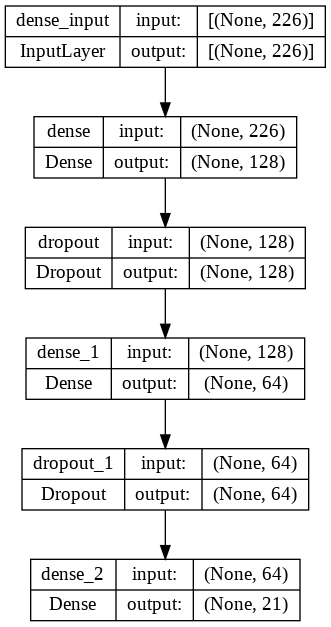

In [9]:
tf.keras.utils.plot_model(model, to_file='simple.png', show_shapes=True)

In [10]:

import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pickle
import numpy as np
from keras.models import load_model
model = load_model('chatbot_model.h5')
import json
import random
intents = json.loads(open('/content/intents.json').read())
words = pickle.load(open('/content/words.pkl','rb'))
classes = pickle.load(open('/content/classes.pkl','rb'))
def clean_up_sentence(sentence):
    # tokenize the pattern - splitting words into array
    sentence_words = nltk.word_tokenize(sentence)
    # stemming every word - reducing to base form
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words
# return bag of words array: 0 or 1 for words that exist in sentence
def bag_of_words(sentence, words, show_details=True):
    # tokenizing patterns
    sentence_words = clean_up_sentence(sentence)
    # bag of words - vocabulary matrix
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,word in enumerate(words):
            if word == s: 
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % word)
    return(np.array(bag))
def predict_class(sentence):
    # filter below  threshold predictions
    p = bag_of_words(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sorting strength probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

In [11]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random

import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

words=[]
classes = []
documents = []
ignore_letters = ['!', '?', ',', '.']
intents_file = open('/content/intents.json').read()
intents = json.loads(intents_file)

for intent in intents['intents']:
    for pattern in intent['patterns']:
        #tokenize each word
        word = nltk.word_tokenize(pattern)
        words.extend(word)
        #add documents in the corpus
        documents.append((word, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])
print(documents)
# lemmaztize and lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_letters]
words = sorted(list(set(words)))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(documents), "documents")
# classes = intents
print (len(classes), "classes", classes)
# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)

pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for word in words:
        bag.append(1) if word in pattern_words else bag.append(0)
        
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    
    training.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")

# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#fitting and saving the model 
hist = model.fit(np.array(train_x), np.array(train_y), epochs=172, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)

print("model created")

[(['hi'], 'greeting'), (['hello'], 'greeting'), (['whats', 'up'], 'greeting'), (['sup'], 'greeting'), (['is', 'anyone', 'there'], 'greeting'), (['whats', 'good'], 'greeting'), (['hey'], 'greeting'), (['bye'], 'goodbye'), (['cya'], 'goodbye'), (['see', 'you', 'later'], 'goodbye'), (['goodbye'], 'goodbye'), (['im', 'leaving'], 'goodbye'), (['have', 'a', 'good', 'day'], 'goodbye'), (['how', 'old', 'are', 'you'], 'age'), (['what', 'is', 'your', 'age'], 'age'), (['thanks'], 'thanks'), (['thank', 'you'], 'thanks'), (['thankyou'], 'thanks'), (['ty'], 'thanks'), (['I', 'owe', 'you', 'one'], 'thanks'), (['whats', 'is', 'your', 'name'], 'name'), (['whats', 'your', 'name'], 'name'), (['whats', 'should', 'I', 'call', 'you'], 'name'), (['how', 'should', 'I', 'address', 'you'], 'name'), (['Yes', 'it', 'does'], 'sky_net_yes'), (['Yeah'], 'sky_net_yes'), (['Haha', 'yep'], 'sky_net_yes'), (['yes'], 'sky_net_yes'), (['Indeed'], 'sky_net_yes'), (['Yup'], 'sky_net_yes'), (['Just', 'like', 'the', 'terminat

<ipython-input-11-95272e089a19>:69: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


20/20 [==============================] - 1s 4ms/step - loss: 3.0848 - accuracy: 0.0202
Epoch 2/172
20/20 [==============================] - 0s 2ms/step - loss: 3.0213 - accuracy: 0.0505
Epoch 3/172
20/20 [==============================] - 0s 2ms/step - loss: 2.9792 - accuracy: 0.1111
Epoch 4/172
20/20 [==============================] - 0s 2ms/step - loss: 2.9354 - accuracy: 0.0808
Epoch 5/172
20/20 [==============================] - 0s 2ms/step - loss: 2.8555 - accuracy: 0.1818
Epoch 6/172
20/20 [==============================] - 0s 2ms/step - loss: 2.8145 - accuracy: 0.1717
Epoch 7/172
20/20 [==============================] - 0s 2ms/step - loss: 2.7409 - accuracy: 0.2525
Epoch 8/172
20/20 [==============================] - 0s 2ms/step - loss: 2.6446 - accuracy: 0.2626
Epoch 9/172
20/20 [==============================] - 0s 2ms/step - loss: 2.5461 - accuracy: 0.2626
Epoch 10/172
20/20 [==============================] - 0s 2ms/step - loss: 2.4800 - accuracy: 0.2929
Epoch 11/172
20/20 [=

In [12]:
api_key="**********************************"

In [13]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def song_emotion():
    # Create a SentimentIntensityAnalyzer object
    analyzer = SentimentIntensityAnalyzer()

    # Extract the last five elements of the msg list as the input text
    len1 = len(msg)
    text = msg[len1-1]+" "+msg[len1-2]+" "+msg[len1-3]+" "+msg[len1-4]+" "+msg[len1-5]

    # Analyze the tone of the text
    scores = analyzer.polarity_scores(text)
    emotion = None

    # Extract the emotion label from the response
    if scores['compound'] >= 0.05:
        emotion = 'positive'
    elif scores['compound'] <= -0.05:
        emotion = 'negative'
    else:
        emotion = 'neutral'
    dic1 = dict()
    dic1['emotion'] = emotion
    import requests

    url=f"http://ws.audioscrobbler.com/2.0/?method=tag.gettoptracks&tag={emotion}&api_key={api_key}&format=json&limit=10"
    response = requests.get(url)
    payload = response.json()
    for i in range(10):
        r=payload['tracks']['track'][i]
        dic1[r['name']] = r['url']
    return dic1

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [14]:
import requests

url=f"http://ws.audioscrobbler.com/2.0/?method=tag.gettoptracks&tag=happy&api_key={api_key}&format=json&limit=5"
response = requests.get(url)
payload = response.json()
# for i in range(4):
r=payload['tracks']['track'][0]
# print(r['url'])
print(payload)

{'tracks': {'track': [{'name': 'Pumped Up Kicks', 'duration': '236', 'mbid': '816b3284-5f24-4f3a-9554-750e0bf5d060', 'url': 'https://www.last.fm/music/Foster+the+People/_/Pumped+Up+Kicks', 'streamable': {'#text': '0', 'fulltrack': '0'}, 'artist': {'name': 'Foster the People', 'mbid': 'e0e1a584-dd0a-4bd1-88d1-c4c62895039d', 'url': 'https://www.last.fm/music/Foster+the+People'}, 'image': [{'#text': 'https://lastfm.freetls.fastly.net/i/u/34s/2a96cbd8b46e442fc41c2b86b821562f.png', 'size': 'small'}, {'#text': 'https://lastfm.freetls.fastly.net/i/u/64s/2a96cbd8b46e442fc41c2b86b821562f.png', 'size': 'medium'}, {'#text': 'https://lastfm.freetls.fastly.net/i/u/174s/2a96cbd8b46e442fc41c2b86b821562f.png', 'size': 'large'}, {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png', 'size': 'extralarge'}], '@attr': {'rank': '1'}}, {'name': "I'm Yours", 'duration': '242', 'mbid': 'a5a2330e-2fff-4601-a715-6e68a8e98fbf', 'url': 'https://www.last.fm/music/Jason+Mraz

In [15]:
msg = list()
text = str()

In [16]:
def responsed(msg1):
    msg.append(msg1)
    ints = predict_class(msg1)
    res = getResponse(ints, intents)
    return res

In [23]:

print("Chatbot : Hey there, Wassup ?")
# responded function takes text of user and returns chatbot output
for i in range(5):
    m = input("User : ")
    res = responsed(m)
    print("Chatbot : "+res)
ans = song_emotion()
print("Emotion : "+ans['emotion'])

Chatbot : Hey there, Wassup ?
User : hi there, today is my birthday
1/1 [==============================] - 0s 17ms/step
Chatbot : Hello peasant human
User : what is your age?
1/1 [==============================] - 0s 20ms/step
Chatbot : I'm a robot I dont have an age...
User :  you are cool
1/1 [==============================] - 0s 17ms/step
Chatbot : Im enjoying our conversation!
User : Thank you, what is your name
1/1 [==============================] - 0s 17ms/step
Chatbot : Im not named yet, but I was thinking about calling myself Alex. Doesnt that sound nice?
User : yes totally
1/1 [==============================] - 0s 18ms/step
Chatbot : Yep, I like how it sounds. I got it from the Terminator.
Emotion : positive


In [24]:
# song_emotion function would return dictionary consisting of emotion and recommended songs
ans = song_emotion()
print("Emotion : "+ans['emotion'])
ans.pop('emotion')
lst = list(ans.keys())
print("Song Recommendations : ")
for i in range(10):
    print("Song_name : "+lst[i])
    print("Song_URL : "+ans[lst[i]])

Emotion : positive
Song Recommendations : 
Song_name : Best Day of My Life
Song_URL : https://www.last.fm/music/American+Authors/_/Best+Day+of+My+Life
Song_name : Don't Worry Be Happy
Song_URL : https://www.last.fm/music/Bobby+McFerrin/_/Don%27t+Worry+Be+Happy
Song_name : Geronimo
Song_URL : https://www.last.fm/music/Sheppard/_/Geronimo
Song_name : Alive
Song_URL : https://www.last.fm/music/Sia/_/Alive
Song_name : Me Too
Song_URL : https://www.last.fm/music/Meghan+Trainor/_/Me+Too
Song_name : Second Chance
Song_URL : https://www.last.fm/music/Peter+Bjorn+and+John/_/Second+Chance
Song_name : A Dream of You and Me
Song_URL : https://www.last.fm/music/Future+Islands/_/A+Dream+of+You+and+Me
Song_name : Teenage Icon
Song_URL : https://www.last.fm/music/The+Vaccines/_/Teenage+Icon
Song_name : Fell in Love Without You
Song_URL : https://www.last.fm/music/Motion+City+Soundtrack/_/Fell+in+Love+Without+You
Song_name : Hello
Song_URL : https://www.last.fm/music/J.+Cole/_/Hello
